In [1]:
#Import the Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
coordinates = list(lat_lngs)

In [5]:
#Create a list for holding the cities
cities = []
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)

626

In [6]:
#Create an empty list to hold the the weather data
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval.       ")
print("--------------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set unbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
    
    #Run and API request for each of the cities.
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval.       
--------------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | forestville
Processing Record 3 of Set 1 | amderma
City not found. Skipping...
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | kavieng
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | vao
Processing Record 12 of Set 1 | majene
Processing Record 13 of Set 1 | cayenne
Processing Record 14 of Set 1 | norman wells
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | hilliard
Processing Record 17 of Set 1 | beloha
Processing Record 18 of Set 1 | rundu
Processing Record 19 of Set 1 | labrea
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | dikson
Processing Record 23 of Set 1

Processing Record 37 of Set 4 | okaihau
Processing Record 38 of Set 4 | susehri
Processing Record 39 of Set 4 | saint pete beach
Processing Record 40 of Set 4 | itoman
Processing Record 41 of Set 4 | gerash
Processing Record 42 of Set 4 | xichang
Processing Record 43 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 44 of Set 4 | sturgeon bay
Processing Record 45 of Set 4 | krasnoselkup
Processing Record 46 of Set 4 | airai
Processing Record 47 of Set 4 | fortuna
Processing Record 48 of Set 4 | touros
Processing Record 49 of Set 4 | trinidad
Processing Record 50 of Set 4 | praya
Processing Record 1 of Set 5 | ketchikan
Processing Record 2 of Set 5 | yulara
Processing Record 3 of Set 5 | bengkulu
Processing Record 4 of Set 5 | sisimiut
Processing Record 5 of Set 5 | kenai
Processing Record 6 of Set 5 | ponta do sol
Processing Record 7 of Set 5 | kavaratti
Processing Record 8 of Set 5 | redlands
Processing Record 9 of Set 5 | palabuhanratu
City not found. Skipping...
Proc

Processing Record 31 of Set 8 | sovetskiy
Processing Record 32 of Set 8 | sungaipenuh
Processing Record 33 of Set 8 | catuday
Processing Record 34 of Set 8 | namatanai
Processing Record 35 of Set 8 | labuhan
Processing Record 36 of Set 8 | lasa
Processing Record 37 of Set 8 | artyk
City not found. Skipping...
Processing Record 38 of Set 8 | asekeyevo
Processing Record 39 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 40 of Set 8 | prince rupert
Processing Record 41 of Set 8 | portland
Processing Record 42 of Set 8 | warqla
City not found. Skipping...
Processing Record 43 of Set 8 | rylsk
Processing Record 44 of Set 8 | pevek
Processing Record 45 of Set 8 | longyearbyen
Processing Record 46 of Set 8 | mataram
Processing Record 47 of Set 8 | katsuura
Processing Record 48 of Set 8 | san jeronimo
Processing Record 49 of Set 8 | rodrigues alves
Processing Record 50 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 1 of Set 9 | shimoda
Processing Record 2

Processing Record 19 of Set 12 | sorvag
City not found. Skipping...
Processing Record 20 of Set 12 | jega
Processing Record 21 of Set 12 | ayni
Processing Record 22 of Set 12 | klyuchi
Processing Record 23 of Set 12 | caceres
Processing Record 24 of Set 12 | tsogni
Processing Record 25 of Set 12 | alvinopolis
Processing Record 26 of Set 12 | yerbogachen
Processing Record 27 of Set 12 | kununurra
Processing Record 28 of Set 12 | dianopolis
City not found. Skipping...
Processing Record 29 of Set 12 | koshki
Processing Record 30 of Set 12 | saint-michel-des-saints
Processing Record 31 of Set 12 | savannah bight
Processing Record 32 of Set 12 | dabola
Processing Record 33 of Set 12 | kailua
Processing Record 34 of Set 12 | elk city
Processing Record 35 of Set 12 | quesnel
Processing Record 36 of Set 12 | grindavik
Processing Record 37 of Set 12 | otjimbingwe
Processing Record 38 of Set 12 | usinsk
Processing Record 39 of Set 12 | marzuq
Processing Record 40 of Set 12 | nyuksenitsa
Processi

In [7]:
len(city_data)

583

In [8]:
#Convert the array of dictionaries to a Pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial Do Cabo,-22.9661,-42.0278,77.00,73,0,21.85,BR,2021-04-23 17:26:56
1,Forestville,38.8451,-76.8750,62.01,29,40,16.11,US,2021-04-23 17:26:56
2,Busselton,-33.6500,115.3333,61.00,79,59,6.67,AU,2021-04-23 17:26:57
3,Kavieng,-2.5744,150.7967,76.33,86,100,10.58,PG,2021-04-23 17:26:57
4,Souillac,-20.5167,57.5167,78.80,83,40,9.22,MU,2021-04-23 17:26:57
5,Bethel,41.3712,-73.4140,55.99,26,1,17.27,US,2021-04-23 17:26:58
6,Hobart,-42.8794,147.3294,51.80,66,88,17.27,AU,2021-04-23 17:26:01
7,Lebu,-37.6167,-73.6500,58.35,71,60,4.68,CL,2021-04-23 17:26:58
8,Ilulissat,69.2167,-51.1000,41.00,48,20,16.11,GL,2021-04-23 17:26:47
9,Vao,-22.6667,167.4833,75.60,79,87,8.61,NC,2021-04-23 17:26:58


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arraial Do Cabo,BR,2021-04-23 17:26:56,-22.9661,-42.0278,77.00,73,0,21.85
1,Forestville,US,2021-04-23 17:26:56,38.8451,-76.8750,62.01,29,40,16.11
2,Busselton,AU,2021-04-23 17:26:57,-33.6500,115.3333,61.00,79,59,6.67
3,Kavieng,PG,2021-04-23 17:26:57,-2.5744,150.7967,76.33,86,100,10.58
4,Souillac,MU,2021-04-23 17:26:57,-20.5167,57.5167,78.80,83,40,9.22


In [10]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the dataframe to a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

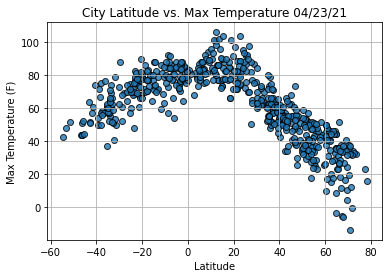

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

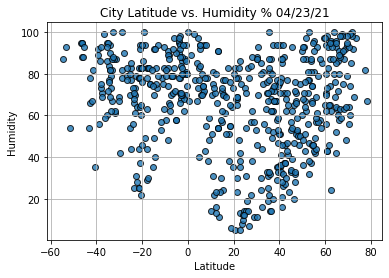

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity % "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

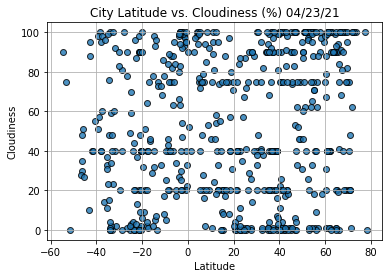

In [14]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

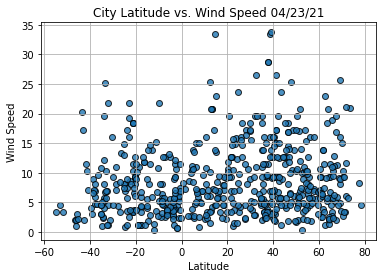

In [15]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print("The r_value is " + str(round(r_value, 2)))

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

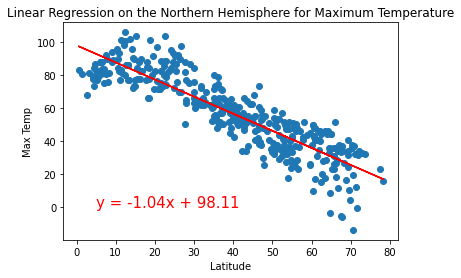

The r_value is -0.88


In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',
                       (5,0))


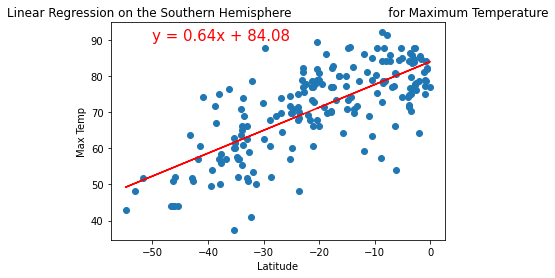

The r_value is 0.72


In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


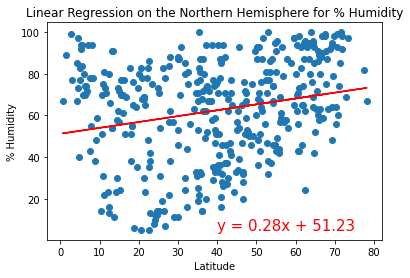

The r_value is 0.23


In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',
                       (40,5))

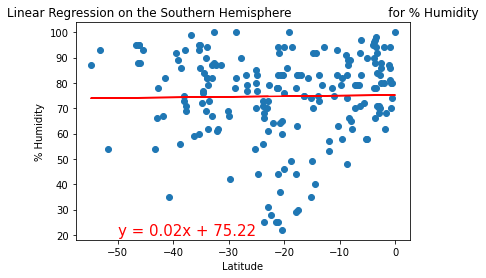

The r_value is 0.02


In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))



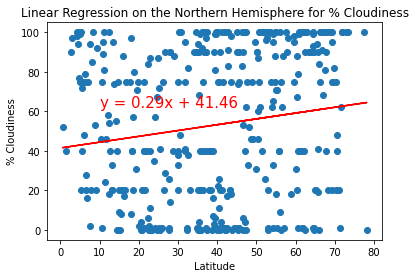

The r_value is 0.15


In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',
                       (10,62))

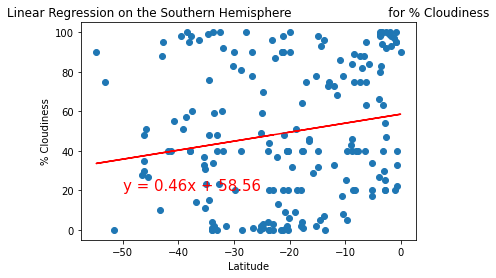

The r_value is 0.18


In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,20))




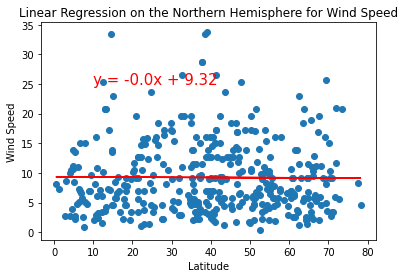

The r_value is -0.01


In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',
                       (10,25))

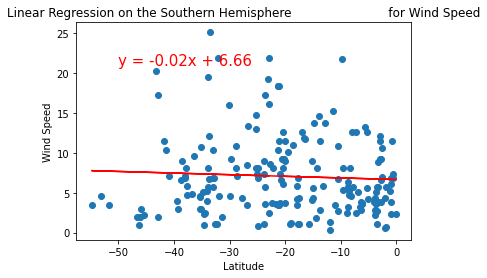

The r_value is -0.06


In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,21))


